# Droite d'étalonnage

In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import t
from packaging import version

etalonnage = np.array([2 , 130,254,392,511,624,3,130,255,387,509,625])
gamme =np.array([0 , 0.5 , 1, 1.5,2,2.5,0 , 0.5 , 1, 1.5,2,2.5])
x_i = gamme
y_i = etalonnage

# Question 1,2

## Méthode automatique

a : 250.57142857142856 u_a 1.8674439586710003
b : 5.285714285714334 u_b 2.826983681363738


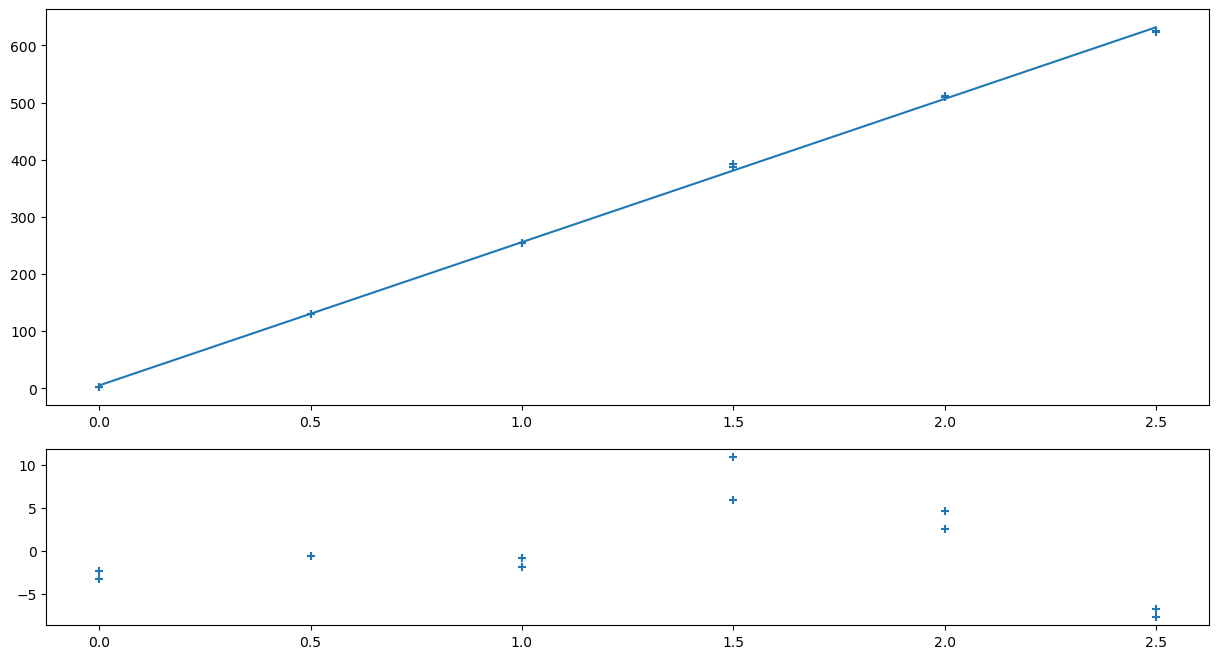

In [2]:
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(3, 1,hspace=0.25)

#droite
ax1 = fig.add_subplot(gs[0:2,0])
#points expérimentaux
ax1.scatter(gamme,etalonnage,marker='+')
#modélisation par une droite affine
coeffs = np.polyfit(gamme,etalonnage,1) #plus basique mais peut-être connu
coeffs2 = stats.linregress(gamme,etalonnage) #plus sophistiqué mais plus complet
a,b,r,p,ua=coeffs2

#on affiche l'incertitude sur l'ordonnée à l'origine uniquement pour les versions pas trop vieilles de scipy
if version.parse(scipy. __version__) > version.parse('1.6') :
    #il manque l'incertitude sur l'ordonnée à l'origine pour les versions de scipy inférieures à 1.6
    ub=coeffs2.intercept_stderr
    print('a : {} u_a {}\nb : {} u_b {}'.format(a,ua,b,ub))
else:
    print('a : {} u_a {}\nb : {} '.format(a,ua,b))


#tracé de la droite correspondant à la modélisation
xs = np.linspace(np.min(gamme),np.max(gamme),2)
ys = np.polyval(coeffs,xs)
ax1.plot(xs,ys)

#résidus
ax2 = fig.add_subplot(gs[2,0])
ax2.scatter(gamme,etalonnage-np.polyval(coeffs,gamme),marker='+')


## Méthode manuelle

In [3]:
#Formule 6.11
u_yi = np.std(y_i-a*x_i-b,ddof=2)

#Formule 6.8
upDelta = np.var(x_i)*x_i.size**2

#Formule 6.12
ua_man = np.sqrt( u_yi**2 /(np.var(x_i)*x_i.size) ) 
# u_yi*np.sqrt( x_i.size/upDelta )

#Formule 6.13
ub_man = np.sqrt( u_yi**2 *np.sum(x_i**2)/(np.var(x_i)*x_i.size**2) ) 
# u_yi*np.sqrt(np.sum(x_i**2)/upDelta )

print("Delta : \t{} \n uy_i : \t{} \n Var(x_i) : \t{} \n n : \t{}\n sum ( x_i²) : \t{}".format(upDelta,u_yi,np.var(x_i),x_i.size,np.sum(x_i**2)))
print('\n\n\n\na : {} u_a {}\nb : {} u_b {}'.format(a,ua_man,b,ub_man))

Delta : 	105.0 
 uy_i : 	5.52397372498146 
 Var(x_i) : 	0.7291666666666666 
 n : 	12
 sum ( x_i²) : 	27.5




a : 250.57142857142856 u_a 1.8674439586706455
b : 5.285714285714334 u_b 2.8269836813632008


# Question 3

In [4]:
intervalle = 0.95
student = t.interval(intervalle,x_i.size-2)
print('coefficient de student {:.2f}'.format(student[1]))
print('b = {:.0f}±{:.0f} ({:.0f}%)'.format(b,ub*student[1],intervalle*100))

coefficient de student 2.23
b = 5±6 (95%)


# Question 4

In [5]:
#régression linéaire au lieu d'avoir une régression affine
x_i2=x_i[:,np.newaxis]
coefflin=np.linalg.lstsq(x_i2,y_i,rcond=None)
abis = coefflin[0][0]
#print(coefflin)

#Formule 6 du TD, 
# coefflin[1][0] = np.square(y_i-a*x_i).sum()
u_yi = np.sqrt(coefflin[1][0]/(x_i.size-1))
u_abis = u_yi*np.sqrt( np.sum(x_i**2)/(np.sum(x_i**2)**2) )

print('u_y : {}'.format(u_yi))
print(" sum ( x_i²) : \t{}\n\n\n\n".format(np.sum(x_i**2)))


print('a : {} u_a {}'.format(abis,u_abis))

u_y : 6.118661334714105
 sum ( x_i²) : 	27.5




a : 253.4545454545455 u_a 1.1667829357826804


# Question 5

In [6]:
Uis = np.array([484,481,484,483,483,481])
#U_0
U0 = np.average(Uis)
sigU = np.std(Uis,ddof=1)
sigU0 = sigU/np.sqrt(Uis.size)
print('U0 : {:.2f}, u_U : {:.2f}, u_U0 : {:.2f}'.format(U0,sigU,sigU0))

U0 : 482.67, u_U : 1.37, u_U0 : 0.56


# Question 6

In [7]:
C1 = U0/abis
urelC1 = np.sqrt((sigU0/U0)**2+(u_abis/abis)**2)
print('C_1 : {:.3e}, u_C1/C_1 : {:.3e}, u_C1 : {:.3e}'.format(C1,urelC1,urelC1*C1))


C_1 : 1.904e+00, u_C1/C_1 : 4.746e-03, u_C1 : 9.039e-03


# Question 7

In [8]:
urelU0 = sigU0/U0
urelabis = u_abis/abis


deglib = urelC1**4/(1/5*urelU0**4+1/11*urelabis**4)
print('nb de degré de liberté effectif : {}'.format(np.floor(deglib)))
texp = t.interval(intervalle,np.floor(deglib))[1]
print('coefficient de student {:.2f}'.format(texp))
UC1 = texp * urelC1*C1
print('C1 = {:.2f}±{:.2f} mg/L ({:.0f}%)'.format(C1,UC1,intervalle*100))


nb de degré de liberté effectif : 12.0
coefficient de student 2.18
C1 = 1.90±0.02 mg/L (95%)


# Question 8

In [9]:
C0 = 1000*C1
urelV100 = 0.1/(100*np.sqrt(3))
urelV1000 = 0.4/(1000*np.sqrt(3))
urelV10 = 0.02/(10*np.sqrt(3))
urelC0 = np.sqrt(urelC1**2+(urelV100)**2+(urelV1000)**2+2*(urelV10)**2)

print('u_C0/C_0 : {:.3e}'.format(urelC0))
uC0 = C0*urelC0
print('u_C0 : {:.3e}'.format(uC0))
UC0 = texp * uC0
print('C0 = {:.2f}±{:.2f} ({:.0f}%) mg/L'.format(C0,UC0,intervalle*100))


u_C0/C_0 : 5.058e-03
u_C0 : 9.632e+00
C0 = 1904.35±20.99 (95%) mg/L


# Question 9 

[82.84376608  5.22036383  1.30304259  0.20848681 10.42434069]


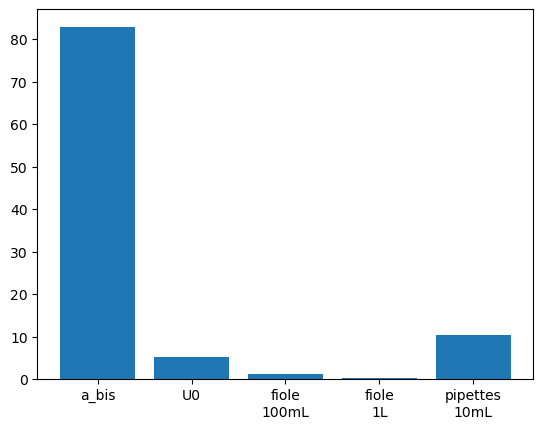

In [10]:
sources = {'a_bis':urelabis**2, 'U0':urelU0**2\
           , 'fiole\n100mL':urelV100**2, 'fiole\n1L':urelV1000**2, 'pipettes\n10mL':2*urelV10**2 }
vals = np.asarray(list(sources.values()))/urelC0**2*100
xs = np.arange(len(vals))
print(vals)
plt.bar(xs,vals,align='center')
plt.xticks(xs, sources.keys())
plt.show()